# Part 1: Data Preprocessing

dataset link:https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

# inporting the libraries and dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv('/content/data.csv')

In [ ]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# data exploration

In [ ]:
dataset.shape

(569, 33)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
dataset.select_dtypes(include='object').columns

Index(['diagnosis'], dtype='object')

In [ ]:
len(dataset.select_dtypes(include='object').columns)

1

In [ ]:
dataset.select_dtypes(include=['float64','int64']).columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
len(dataset.select_dtypes(include=['float64','int64']).columns)

32

In [ ]:
#statical summary
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

# Dealing with the missing values

In [ ]:
dataset.isnull().values.any()

np.True_

In [ ]:
dataset.isnull().values.sum()

np.int64(569)

In [ ]:
dataset.columns[dataset.isnull().any()]

Index(['Unnamed: 32'], dtype='object')

In [ ]:
len(dataset.columns[dataset.isnull().any()])

1

In [ ]:
dataset['Unnamed: 32'].count()

np.int64(0)

In [ ]:
dataset = dataset.drop(columns='Unnamed: 32')

In [ ]:
dataset.shape

(569, 32)

In [ ]:
dataset.isnull().values.any()

np.False_

# Dealing with categorical data

In [ ]:
dataset.select_dtypes(include='object').columns

Index(['diagnosis'], dtype='object')

In [ ]:
dataset['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
dataset['diagnosis'].nunique()

2

In [ ]:
#one hot encoding
dataset = pd.get_dummies(data=dataset, drop_first=True, dtype=int)

In [ ]:
dataset['diagnosis_M'] = dataset['diagnosis_M'].astype(int)

In [ ]:
dataset.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


# Countplot

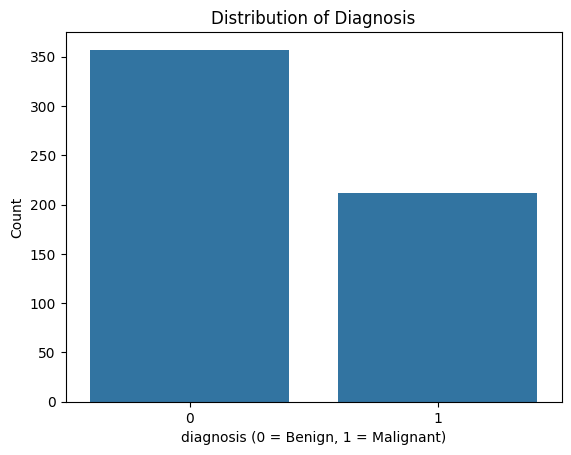

In [ ]:
sns.countplot(x='diagnosis_M', data=dataset)
plt.xlabel("diagnosis (0 = Benign, 1 = Malignant)")
plt.ylabel("Count")
plt.title("Distribution of Diagnosis")
plt.show()

In [ ]:
# B(0) values
(dataset.diagnosis_M == 0).sum()

np.int64(357)

In [ ]:
# M(1) values
(dataset.diagnosis_M == 1).sum()

np.int64(212)

# Correlation matrix and heatmap

In [ ]:
dataset_2 = dataset.drop(columns='diagnosis_M')

In [ ]:
dataset_2.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: title={'center': 'Correleted with diagnosis_M'}>

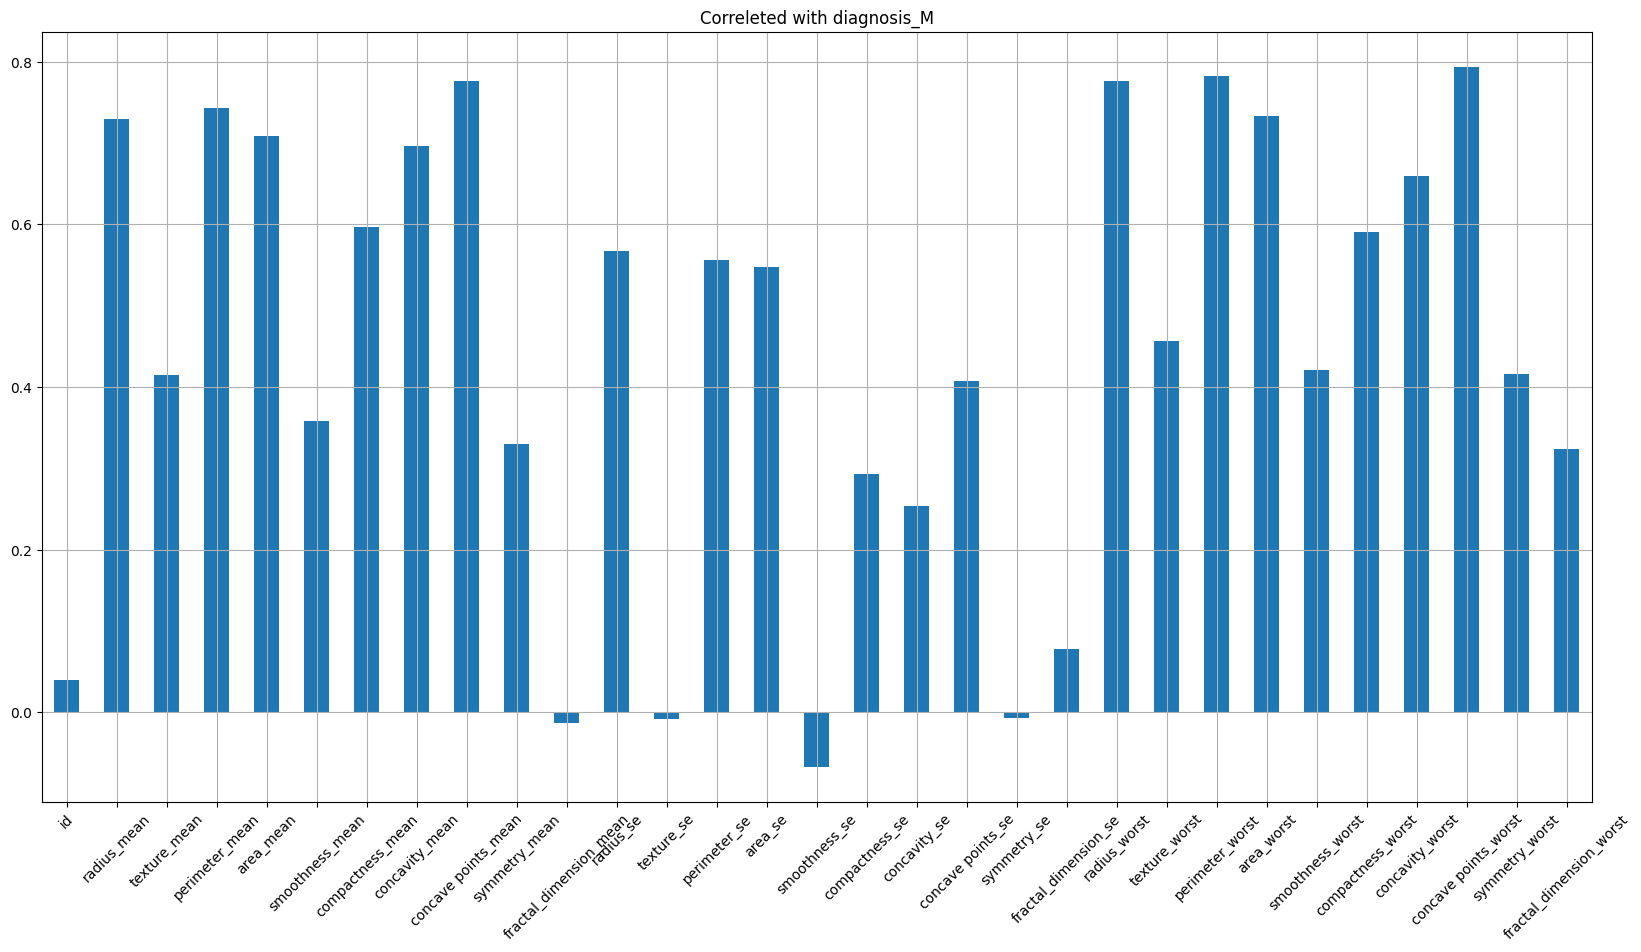

In [ ]:
dataset_2.corrwith(dataset['diagnosis_M']).plot.bar(
    figsize=(20,10), title = 'Correleted with diagnosis_M',rot=45, grid=True
)

In [ ]:
#correlation matix
corr = dataset.corr()

In [ ]:
corr

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,0.039769
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499


<Axes: >

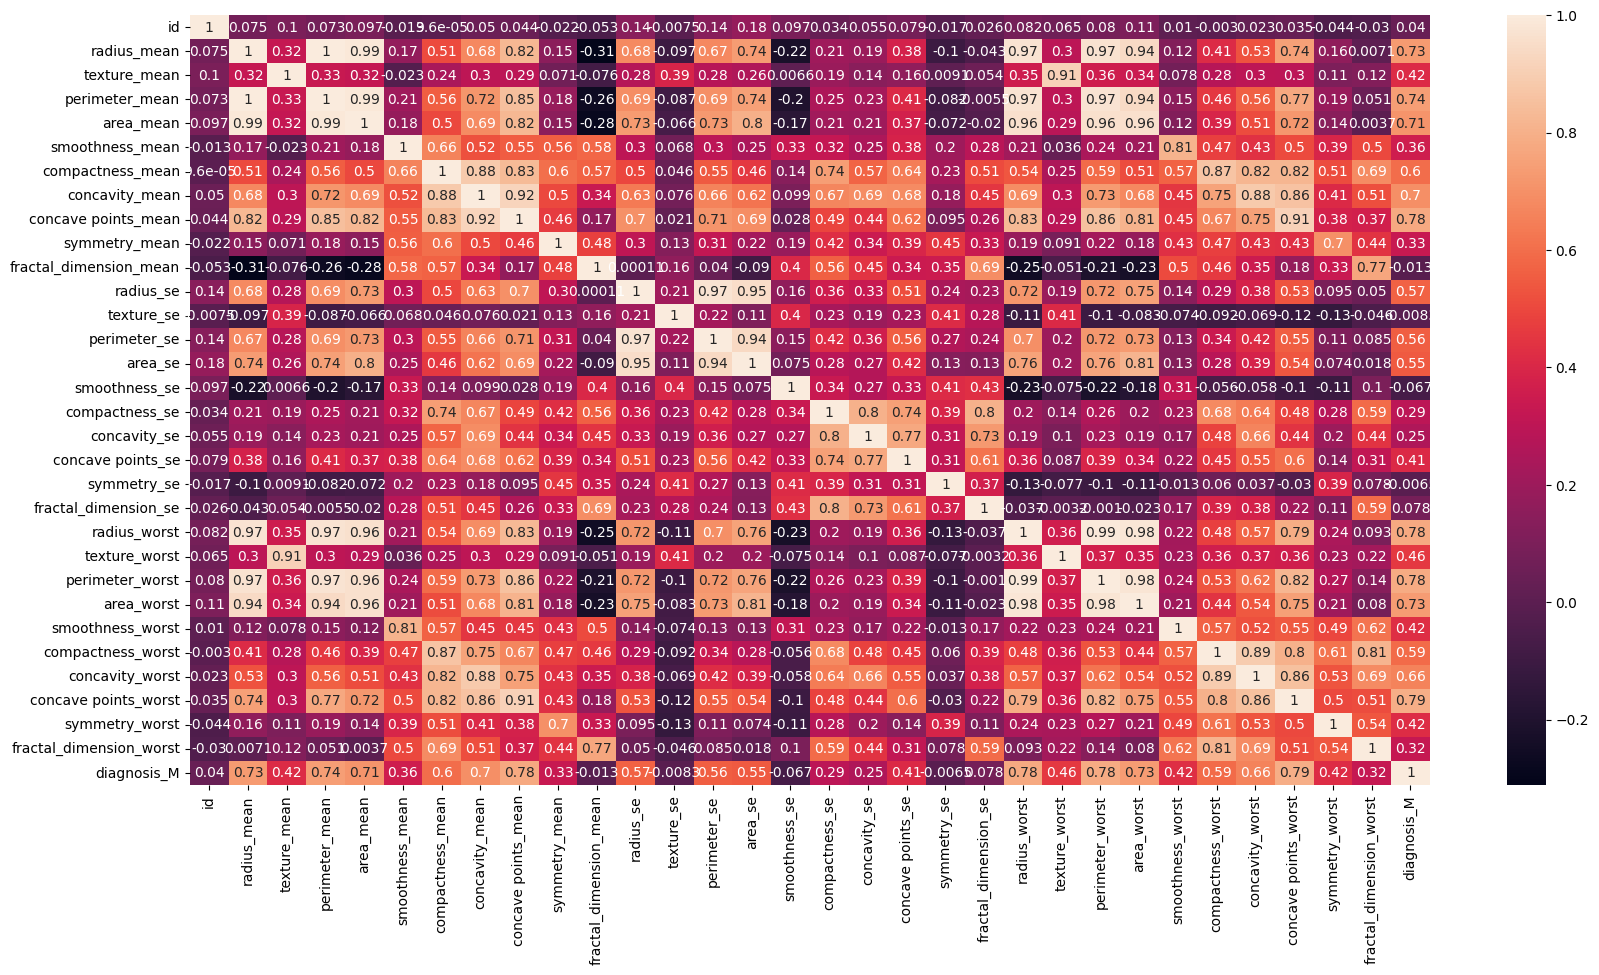

In [ ]:
#heatmap
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)

# Splitting the dataset train and test set

In [ ]:
dataset.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [ ]:
# matrix of features / independent variables
x = dataset.iloc[:,1:-1].values

In [ ]:
x.shape

(569, 30)

In [ ]:
# target variable / depenedent variable
y = dataset.iloc[:,-1].values

In [ ]:
y.shape

(569,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
x_train.shape

(455, 30)

In [ ]:
x_test.shape

(114, 30)

In [ ]:
y_train.shape

(455,)

In [ ]:
y_test.shape

(114,)

# Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train

array([[-0.86208298, -1.00909399, -0.86134671, ..., -0.69796447,
         0.48121048, -0.60496694],
       [-0.94409271, -0.99994093, -0.95993144, ..., -1.19736488,
        -0.97243401, -0.88676483],
       [-0.67261221, -0.61093615, -0.69567528, ..., -0.66597653,
        -1.92004261, -0.5745023 ],
       ...,
       [-0.46051807,  0.12588466, -0.46209901, ..., -0.56777059,
        -0.35197599, -0.34547352],
       [-1.5529443 , -0.16930132, -1.53957692, ..., -1.70752758,
         0.38451573, -0.15398152],
       [-0.16358627, -0.10294168, -0.14834595, ...,  0.46436345,
        -0.382596  , -0.38790641]])

In [ ]:
x_test

array([[-5.32973158e-02, -6.22377472e-01, -1.12757268e-01, ...,
        -7.77485874e-01, -3.61645470e-01, -3.81378270e-01],
       [ 1.41829295e-01,  7.64310153e-01,  1.90769161e-01, ...,
        -5.58141650e-02, -1.04012034e+00, -2.14910793e-01],
       [-6.78268056e-01,  1.16704451e+00, -6.28179506e-01, ...,
         2.47622780e-01, -1.61809642e-01,  8.54615550e-01],
       ...,
       [-8.33803760e-01, -1.20588464e+00, -8.38029989e-01, ...,
        -1.12128143e+00, -5.27638134e-01, -7.51305998e-01],
       [ 1.99977398e+00,  8.46687636e-01,  1.86016452e+00, ...,
         1.29545184e+00, -1.31189636e-01, -4.74948225e-01],
       [-1.24583198e+00,  3.01749021e-05, -1.25486750e+00, ...,
        -1.13264163e+00, -5.66316036e-01, -2.60607747e-01]])

# Part 2: Building the Model

# 1) Logistic Regeression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
classifir_lr = LogisticRegression(random_state=0, max_iter=5000)

In [ ]:
classifir_lr.fit(x_train, y_train)

LogisticRegression(max_iter=5000, random_state=0)

In [ ]:
y_pred = classifir_lr.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [ ]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [ ]:
results = pd.DataFrame([['Logistic Regression',acc, f1, prec, rec]],
                       columns =['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

In [ ]:
results

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.973684,0.963855,0.97561,0.952381


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[71  1]
 [ 2 40]]


# Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
accuracies = cross_val_score(estimator=classifir_lr, X=x_train, y=y_train, cv=10)

In [ ]:
print('Accuracy is {:.2f} %'.format(accuracies.mean()*100))
print('Standard Deviation is {:.2f} %'.format(accuracies.std()*100))

Accuracy is 98.24 %
Standard Deviation is 1.33 %


# 2) Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier_rm = RandomForestClassifier(random_state=0)
classifier_rm.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred = classifier_rm.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [ ]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [ ]:
model_results = pd.DataFrame([['Random forest',acc, f1, prec, rec]],
                       columns =['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

In [ ]:
results = pd.concat([results, model_results], ignore_index=True)

In [ ]:
results

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.973684,0.963855,0.975610,0.952381
1,Random forest,0.947368,0.931818,0.891304,0.976190


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[67  5]
 [ 1 41]]


# Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=classifier_rm, X=x_train, y=y_train, cv=10)

print('Accuracy is {:.2f} %'.format(accuracies.mean()*100))
print('Standard Deviation is {:.2f} %'.format(accuracies.std()*100))

Accuracy is 96.49 %
Standard Deviation is 4.54 %


# Part 3: Randomized Search to find the best parameters (Logistic regression)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
parameters = {'penalty':['l1','elasticnet','none'],
              'C':[0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

In [ ]:
parameters

{'penalty': ['l1', 'elasticnet', 'none'],
 'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [ ]:
random_search = RandomizedSearchCV(estimator=classifir_lr, param_distributions=parameters, n_iter=5,
                                   scoring='roc_auc', n_jobs = 1, cv=5, verbose=3)

In [ ]:
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END C=2.0, penalty=none, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=2.0, penalty=none, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=2.0, penalty=none, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=2.0, penalty=none, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=2.0, penalty=none, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1.25, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1.25, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1.25, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1.25, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1.25, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END ....C=1.25, penalty=none, solver=sag;, score=nan total time=   0.0s
[CV 

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(max_iter=5000, random_state=0),
                   n_iter=5, n_jobs=1,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5,
                                              1.75, 2.0],
                                        'penalty': ['l1', 'elasticnet', 'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='roc_auc', verbose=3)

In [ ]:
random_search.best_estimator_

LogisticRegression(C=1.25, max_iter=5000, penalty='l1', random_state=0,
                   solver='saga')

In [ ]:
random_search.best_score_

np.float64(0.9943240454076367)

In [ ]:
random_search.best_params_

{'solver': 'saga', 'penalty': 'l1', 'C': 1.25}

# Part 4: Final model (Logistic regression)

In [ ]:
from sklearn.linear_model import LogisticRegression

classifir = LogisticRegression(
C=1.25, max_iter=5000, penalty='l1', random_state=0,
                   solver='saga'
)

classifir.fit(x_train, y_train)

LogisticRegression(C=1.25, max_iter=5000, penalty='l1', random_state=0,
                   solver='saga')

In [ ]:
y_pred = classifir.predict(x_test)

In [ ]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

model_results = pd.DataFrame([['Final Logidtic Regression',acc, f1, prec, rec]],
                       columns =['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

results = pd.concat([results, model_results], ignore_index=True)

results

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.973684,0.963855,0.975610,0.952381
1,Random forest,0.947368,0.931818,0.891304,0.976190
2,Final Logidtic Regression,0.956140,0.939759,0.951220,0.928571


# Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=classifir, X=x_train, y=y_train, cv=10)

print('Accuracy is {:.2f} %'.format(accuracies.mean()*100))
print('Standard Deviation is {:.2f} %'.format(accuracies.std()*100))

Accuracy is 97.36 %
Standard Deviation is 1.93 %


# Part 5: Predicting a single observation

In [ ]:
dataset.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [ ]:
single_obs = [[17.99,	10.38,	122.80,	1001.0,	0.11840,	0.27760,	0.3001,	0.14710,	0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,
               184.60,	2019.0,	0.1622,	0.6656,	0.7119,	0.2654,	0.4601,	0.11890,]]

In [ ]:
single_obs

[[17.99,
  10.38,
  122.8,
  1001.0,
  0.1184,
  0.2776,
  0.3001,
  0.1471,
  0.2419,
  0.07871,
  1.095,
  0.9053,
  8.589,
  153.4,
  0.006399,
  0.04904,
  0.05373,
  0.01587,
  0.03003,
  0.006193,
  25.38,
  17.33,
  184.6,
  2019.0,
  0.1622,
  0.6656,
  0.7119,
  0.2654,
  0.4601,
  0.1189]]

In [ ]:
classifir.predict(sc.transform(single_obs))

array([1])